Architecture
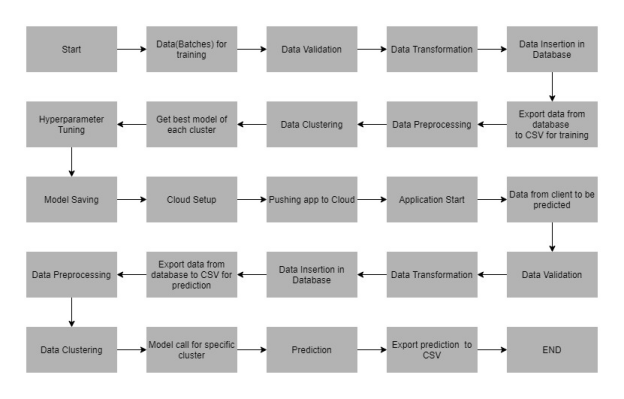

# Linar Regression:-

In [150]:
# to check multi collinearty
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [48]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
df =pd.read_csv('Admission_Prediction.csv')


In [4]:
# checkgin first 5 row from the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
#printing the summry of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
#finding the count of missing value from diffrent column

df.isnull()  #finding the count of missing value form of true and false in column

df.isnull().sum()  #finding the count of missing value from diffrent column

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
df["GRE Score"].mode()

0    312.0
1    324.0
dtype: float64

In [9]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace = True)

#to replace the missing value in the "GRE Score" column with the mode of the column

#mode has been used here to replace the GRE score  with the most occoring score so that data folow the general trend

In [10]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace = True)

#to replace the missing value in the "TOEFL Score" column with the mode of the column

#mode has been used here to replace the TOEFL score  with the most occoring score so that data folow the general trend

In [11]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace = True)

#to replace the missing value in the "University Rating" column with the mode of the column

#mean has been used here to replace the University Rating with the average score

In [12]:
#droping the "Chance of admit" and "serial numrber" as thet are not going to be used as a features for prediction 
x = df.drop(["Chance of Admit","Serial No."],axis = 1)

#'Chance of admit' is the target column which shows the probability of addmission for a candidate 

y = df["Chance of Admit"]

In [13]:
x.head()      # checking  the transfomed feature columns

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


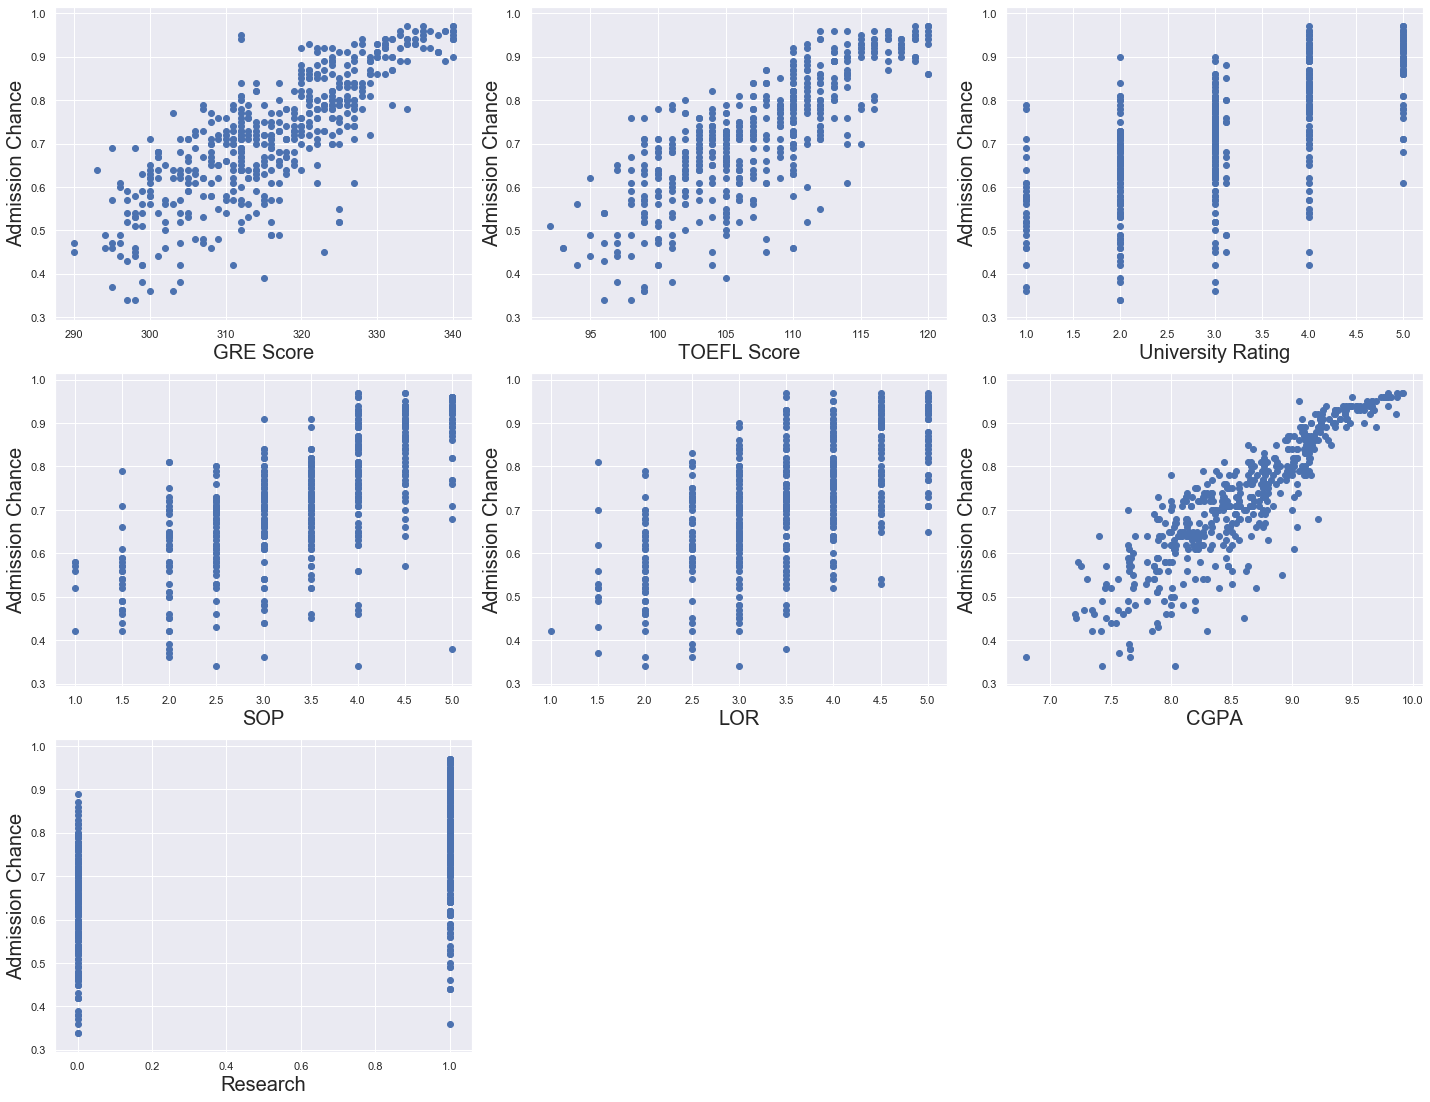

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Admission Chance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

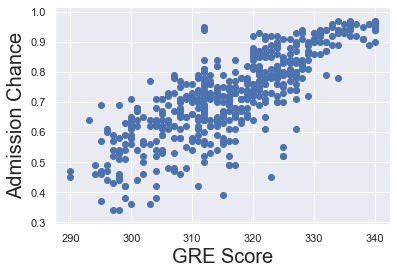

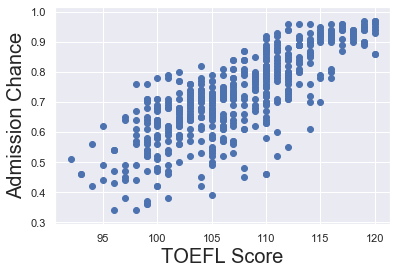

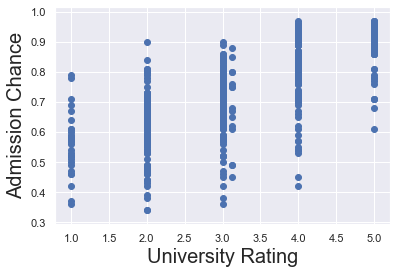

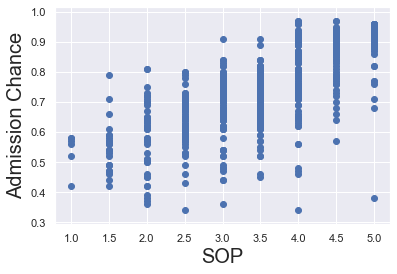

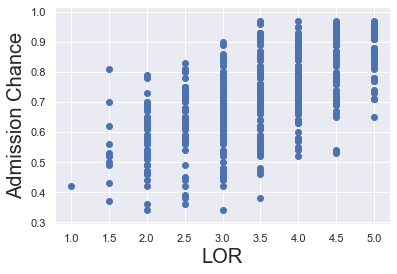

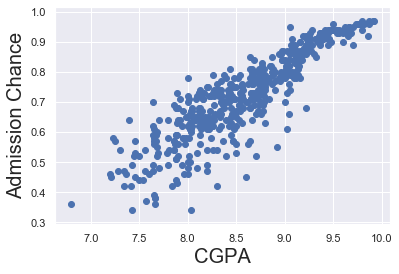

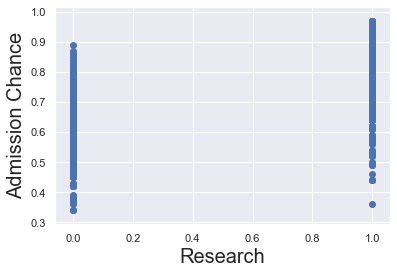

<Figure size 432x288 with 0 Axes>

In [15]:
#Showcasing the relationship between all the columns and the label
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Admission Chance',fontsize=20)
    plt.show()
        
plt.tight_layout()


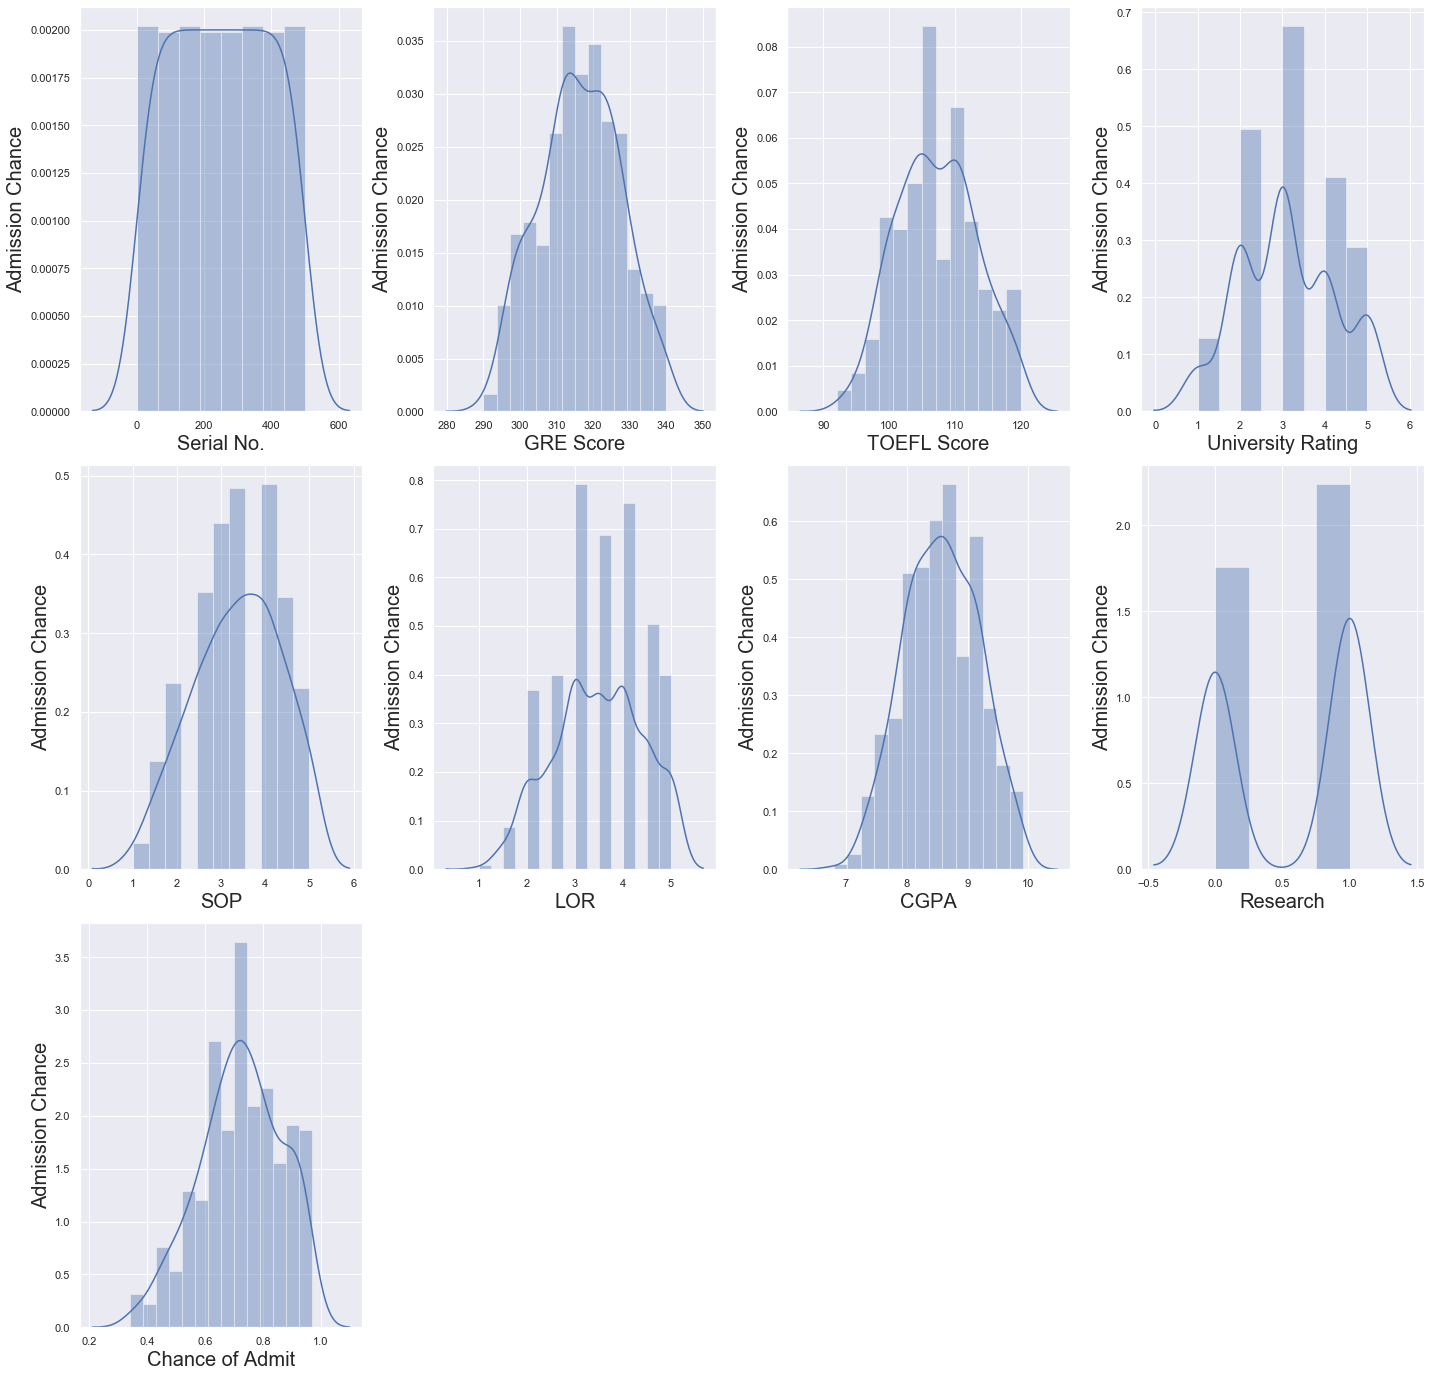

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Admission Chance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
# only used if you want to scale the data 

from sklearn.preprocessing import StandardScaler
scaler_feature = StandardScaler()
scaler_lable = StandardScaler()
scaled_data = scaler_feature.fit_transform(x)
scaled_data

array([[ 1.85052822,  1.77547686,  0.77890565, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.04027672,  0.77890565, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.53548224, -0.1078766 , ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  2.10561387,  1.66568791, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.70055074,  0.77890565, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.95013432,  0.77890565, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [18]:
#spliting the data in to training and test sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.33,random_state = 100)

In [19]:
# without scaling of data used in model

#ftting the datato the linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# calculating the accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x),test_y)
score

0.8076993525686702

In [21]:
reg.predict([[300,110,5,5,5,10,1]])

array([0.93409108])

In [22]:
#Python pickle module is used for serializing and de-serializing a Python object structure to byte code,byte code to object

# saveig the model in to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg,open(filename,'wb'))   # wb ==> write binary format


In [23]:
loaded_model = pickle.load(open(filename,'rb'))  # rb ==> read binary format
a = loaded_model.predict(scaler_feature.transform([[300,110,5,5,5,10,1]]))  

# if datd is used scaler feature then need to use for prediction
a

array([-0.91190243])

In [24]:
a = loaded_model.predict([[300,110,5,5,5,10,1]])

a

array([0.93409108])

# The Problem statement:
This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [25]:
data= pd.read_csv('Advertising.csv') # Reading the data file

In [26]:
data.head() # checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the features?

TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)||
Radio: Advertising dollars spent on Radio||
Newspaper: Advertising dollars spent on Newspaper||
What is the response?||

Sales: sales of a single product in a given market (in thousands of widgets)

In [27]:
data.shape

(200, 5)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [29]:
# finding the count of missing values from different columns

data.isna().sum() 

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

 None of the value are fuound missing and null in data setNow, let's showcase the relationship between the feature and target column

In [30]:
#droping the "sales and Unnamed: 0" as thet are not going to be used as a features for prediction 

x = data.drop(["sales","Unnamed: 0"],axis = 1)

#'sales' is the target column which shows the probability of addmission for a candidate 

y = data["sales"]

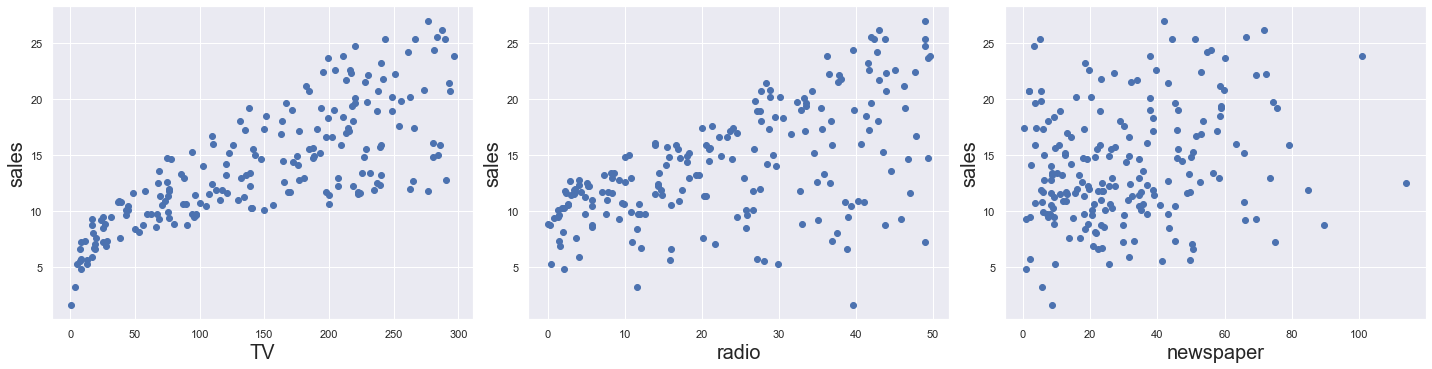

In [31]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [32]:
#taking "tv for linearty check"
# create X and y  
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

In [33]:
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# print intercept and coefficients
print(model.intercept_)
print(model.coef_)


7.032593549127695
[0.04753664]


In [35]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='y ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

# Interpreting the model
How do we interpret the coefficient for spends on TV ad ( 𝛽1 )?

* A "unit" increase in spends on a TV ad is associated with a 0.047537 "unit" increase in Sales.

* Or, an additional $1,000 on TV ads is translated to an increase in sales by 47.53 Dollars.

* As an increase in TV ad expenditure is associated with a decrease in sales,  𝛽1  would be negative.

# Prediction using the model
If the expense on TV ad is $50000, what will be the sales prediction for that market?

$$𝑦=𝛽0+𝛽1𝑥$$
 
$$𝑦=7.032594+0.047537×50$$

In [36]:
#calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of 9,409 widgets in that market.

Let's do the same thing using code.

In [37]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [38]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

# Plotting the Least Squares Line

In [39]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [40]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

In [41]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


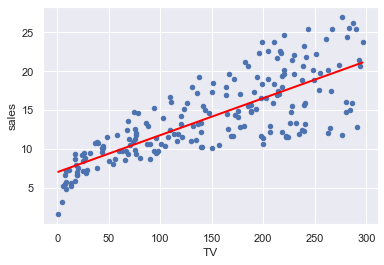

In [42]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [43]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


# need to check

## Model Confidence
### Hypothesis Testing and p-values

In [44]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

# How Well Does the Model Fit the data?
One of the most generic way to evaluate the fit of a linear model is by computing the R-squared value. R-squared explains the proportion of variance, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the null model. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

In [45]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for comparing different models

 explanation

Blue line explains some of the variance in the data (R-squared=0.54)

Green line explains more of the variance (R-squared=0.64)

Red line fits the training data even further (R-squared=0.66)

Let's calculate the R-squared value for our simple linear model:

In [46]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm.score(x , y)

AttributeError: 'OLSResults' object has no attribute 'score'

# 13. Multiple Linear Regression¶

Now, we’ll include multiple features and create a model to see the relationship between those features and the label column. This is called Multiple Linear Regression

$y=β0+β1x1+...+βnxn $

Each x represents a different feature, and each feature has its own coefficient. In this case:

$y=β0+β1×TV+β2×Radio+β3×Newspaper $

Let's estimate these coefficients:



In [2]:
data.head()

NameError: name 'data' is not defined

In [ ]:
### STATSMODELS ###  import statsmodels.formula.api as smf

# create a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm1.params

In [ ]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols,lm2.coef_))

Interpreting coefficients

How do we interpret these coefficients? If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.


For a given amount of Radio and Newspaper ad spending,
an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [1]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

NameError: name 'lm1' is not defined

What are a few key things we learn from this output?

* TV and Radio have small p-values, whereas Newspaper have a large p-value
    * Reject the null hypothesis for TV and Radio
      * There is association between features and Sales
 
    * Fail to reject the null hypothesis for Newspaper
         *There is no association
* TV and Radio ad spending are both positively associated with Sales
     * Newspaper ad spending is slightly negatively associated with Sales
       * However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper
* This model has a higher R-squared (0.897) than the previous model
    * This model provides a better fit to the data than a model that only includes T
    
    
    
What   are the things    to   be   learnt   from   this    summary?

* TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.

* The expenses on bot TV and Radio ads arepositively associated with Sales, whereas the expense on newspaper ad is slightly negatively associated with the Sales.

* This model has a higher value of R-squared (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.

# Interpreting OLS results

* The regression output example below shows that the South and North predictor variables are statistically significant because their p-values equal 0.000. On the other hand, East is not statistically significant because its p-value (0.092) is greater than the usual significance level of 0.05.

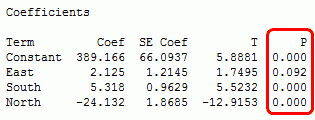
*   Regression analysis results that displays p-values for the independent variables.
*  It is standard practice to use the coefficient p-values to decide whether to include variables in the final model. For the results above, we would consider removing East. Keeping variables that are not statistically significant can reduce the model’s precision.

*     Prob(Omnibus): One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0.062, which implies that the OLS assumption is not satisfied. Due to this, the coefficients estimated out of it are not Best Linear Unbiased Estimators(BLUE).
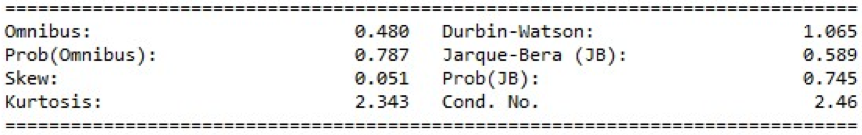

Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. In this case Omnibus is relatively low and the Prob (Omnibus) is relatively high so the data is somewhat normal, but not altogether ideal. A linear regression approach would probably be better than random guessing but likely not as good as a nonlinear approach.

* Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. This result has a small, and therefore good, skew.

    
*    Durbin-watson: Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is ~1.8 implying that the regression results are reliable from the interpretation side of this metric.

# 14. Feature Selection

Deciding which features to include in a linear model

  * Try different models
  * Keep features in the model if they have small p-values
        * Reject null hypothesis
        * Relationship exists
  * Check whether the R-squared value goes up when you add new features

Drawbacks to this approach?

   * Linear models rely upon a lot of assumptions
   * Features being independent
   * If assumptions are violated (which they usually are), R-squared and p-values are less reliable

Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant

R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [ ]:
### STATSMODELS ###

# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula ='sales ~ TV + radio', data=data).fit()

# calculate r-square 
lm1.rsquared

In [ ]:
# add Newspaper to the model (which we believe has no association with Sales)

lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm1.rsquared

Issure with R-squared

  * R-squared will always increase as you add more features to the model, even if they are unrelated to the response
  
          * Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
Solution

   * Adjusted R-squared Penalizes model complexity (to control for overfitting), but this again generally[under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).
          
Better Solution

   * Train/test split or cross-validation
   * More reliable estimate of out-of-sample error
   * Better for choosing which of your models will best generalize to out-of-sample data

There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models

Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models
         

# 16 building a multi linear Regression model 

# 17. Handling Categorical Features with Two Categories

Till now, all the predictors have been numeric. What if one of the predictors is categorical?

We’ll create a new feature called Scale, and shall randomly assign observations as small or large:

In [ ]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Scale'] = 'small'
data.loc[mask_large, 'Scale'] = 'large'
data.head()

For the scikit-learn library, all data must be represented numerically. If the feature only has two categories, we can simply create a dummy variable that represents the categories as a combination of binary value:



In [ ]:
# create a new Series called IsLarge
data['IsLarge'] = data.Scale.map({'small':0, 'large':1})
data.head()

Let's redo the multiple linear regression problem and include the IsLarge predictor:

In [ ]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
i=0
for col in feature_cols:
    print('The Coefficient of ',col, ' is: ',lm.coef_[i])
    i=i+1

How do we interpret the coefficient for **IsLarge**? 
  For a given TV/Radio/Newspaper ad expenditure if the average sales increases by 57.42 widgets, it’s considered as a large       market.

What if the 0/1encoding is reversed? 
  Still, the value of the coefficient shall be same, the only difference being the sign. It’ll be a negative number instead of   positive.


# Handling Categorical variables with More than Two Categories

Let's create a new column called **Targeted Geography**, and randomly assign observations to be **rural, suburban, or urban**:


In [ ]:
#set a seed for reproducibility

np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

We need to represent the ‘Targeted Geography’ column numerically. But mapping urban=0, suburban=1 and rural=2 will mean that rural is two times suburban which is not the case. Hence, we’ll create another dummy variable

In [ ]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

What does the encoding say?

rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1
Now the question is: Why have we used two dummy columns instead of three?

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the dummy variable trap. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns. Let's include the two new dummy variables in the model:

In [ ]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

list(zip(feature_cols, lm.coef_))

How do we interpret the coefficients?

If all other columns are constant, the suburban geography is associated with an average decrease of 106.56 widgets in sales for $1000 spent.

if $1000 is spent in an urban geography, it amounts to an average increase in Sales of 268.13 widgets

# Multi- Collinearity

Origin of the word: The word multi-collinearity consists of two words: Multi, means multiple, and Collinear, meaning being linearly dependent on each other.

For e.g., Let’s consider this equation 
                $$𝑎+𝑏=1=>𝑏=1−𝑎$$ 

It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ changes, automatically the value of ‘b’ will also change. This equation denotes a simple linear relationship among two variables.

**Definition:** The purpose of executing a Linear Regression is to predict the value of a 	dependent variable based on certain independent variables.

So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an 	independent variable with the help of another independent variable  	because now in our model we have two variables which can be defined based 	on a certain set of independent variables which defeats the entire purpose.

* Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent😊.
* We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

<img src="multicollinearity_pic.PNG" width="500">


    The mathematical flow for multicollinearity can be shown as:
<img src="multicollinearity_flow.PNG" width="500">

## Why Should We Care About Multi-Collinearity?
*  coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.

* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.

* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets.

* Can result in a Dummy Variable Trap.

##### Detection
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="correlation matrices.PNG" width="500">
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.



# Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

<img src="RSS_reg- regularization.PNG" width="300">

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="Lasso L1.PNG" width="300">

#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis




#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

<img src="ridge fuction.PNG" width="300">

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

<img src="ridge_vs_lasso.PNG" width="300">

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

<img src="elasticNet.PNG" width="300">
where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).


**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

No let's see the Python Implementation of these concepts:


# multiple linear regrassion using few concepts

**Multi Colinearty**

**Regularization**


No let's see the Python Implementation of these concepts:



In [49]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [50]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [51]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [53]:
data.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [54]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [55]:
data.mean()

Serial No.           250.500000
GRE Score            316.558763
TOEFL Score          107.187755
University Rating      3.121649
SOP                    3.374000
LOR                    3.484000
CGPA                   8.576440
Research               0.560000
Chance of Admit        0.721740
dtype: float64

In [56]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [64]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean()) ## fill na with mean avrage og GRE score

In [65]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean()) ## fill na with mean avrage og GRE score

In [68]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

## fill na with mode most occrance value in University Rating if multiple mode is treir slect index too

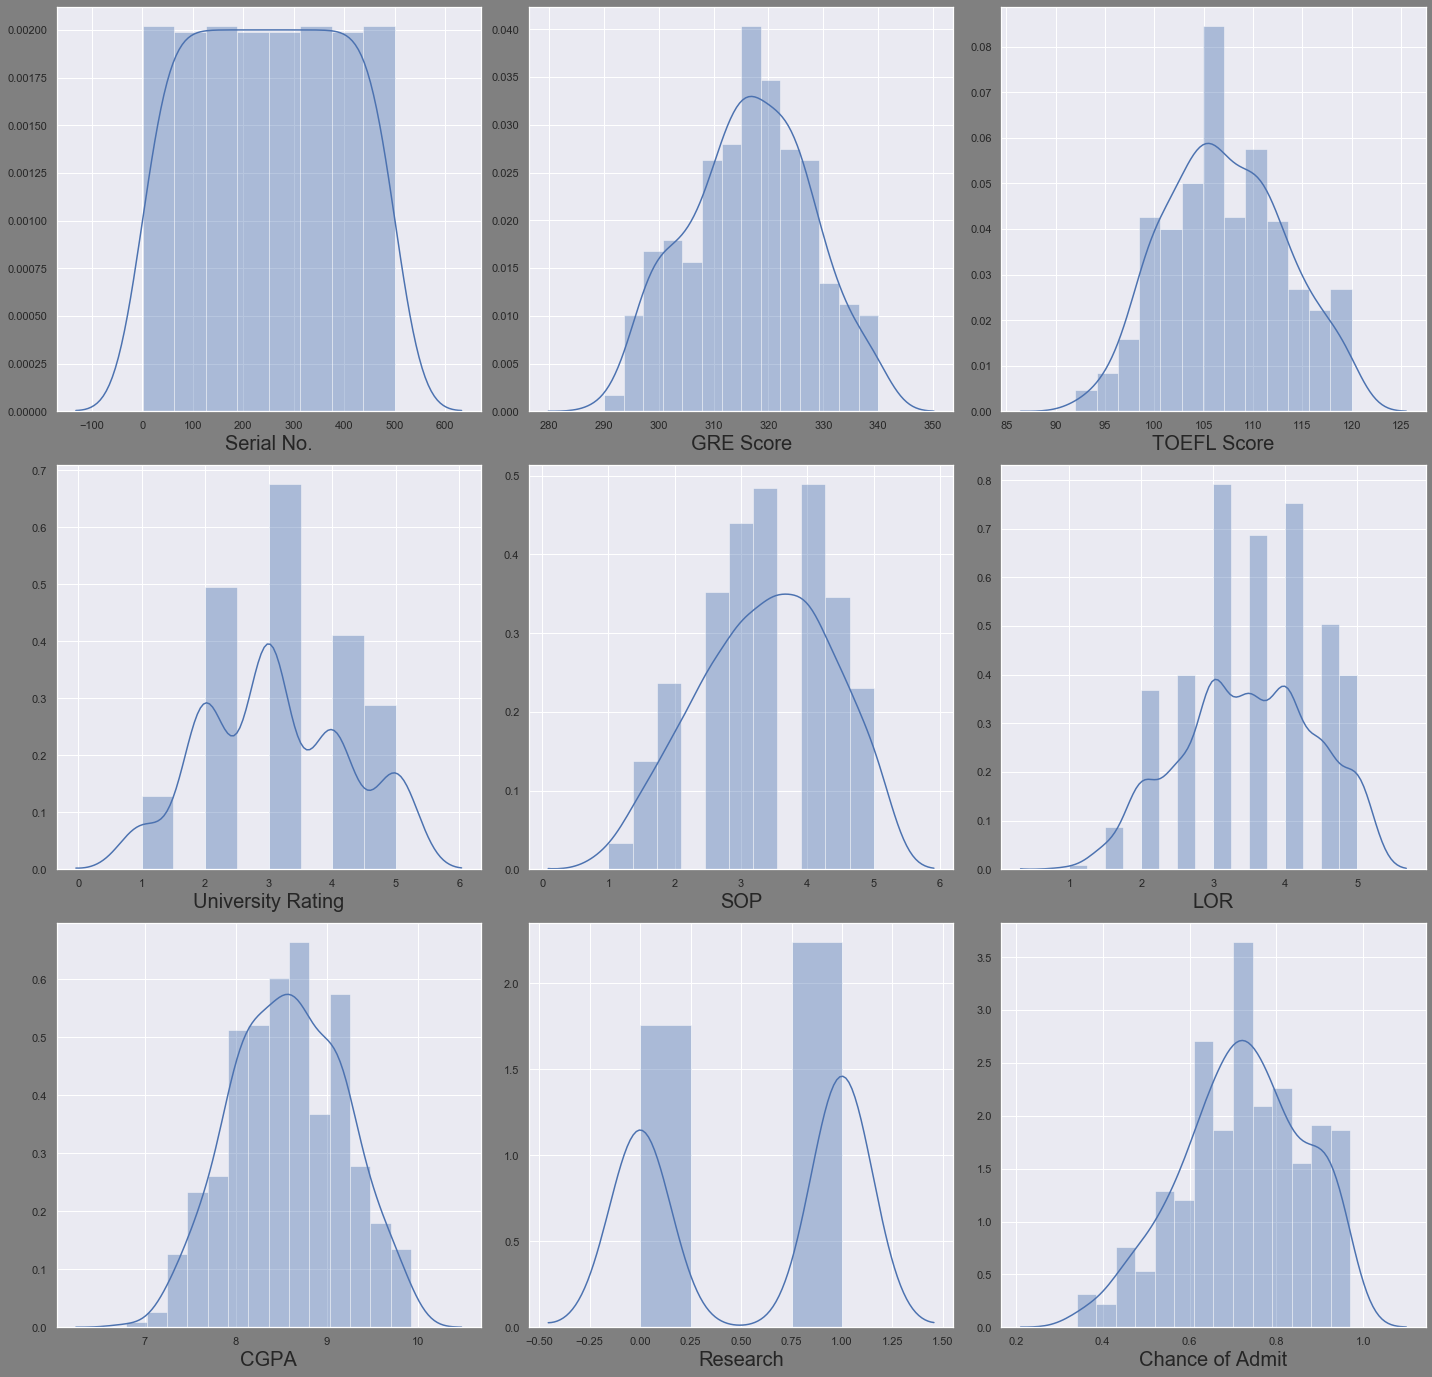

In [76]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='Gray') ## main big size is occupide can say background
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [77]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [81]:
# droping the column which are not inportent fo model and creating X,Y 

X = data.drop(columns = ['Serial No.','Chance of Admit'])

Y = data['Chance of Admit']


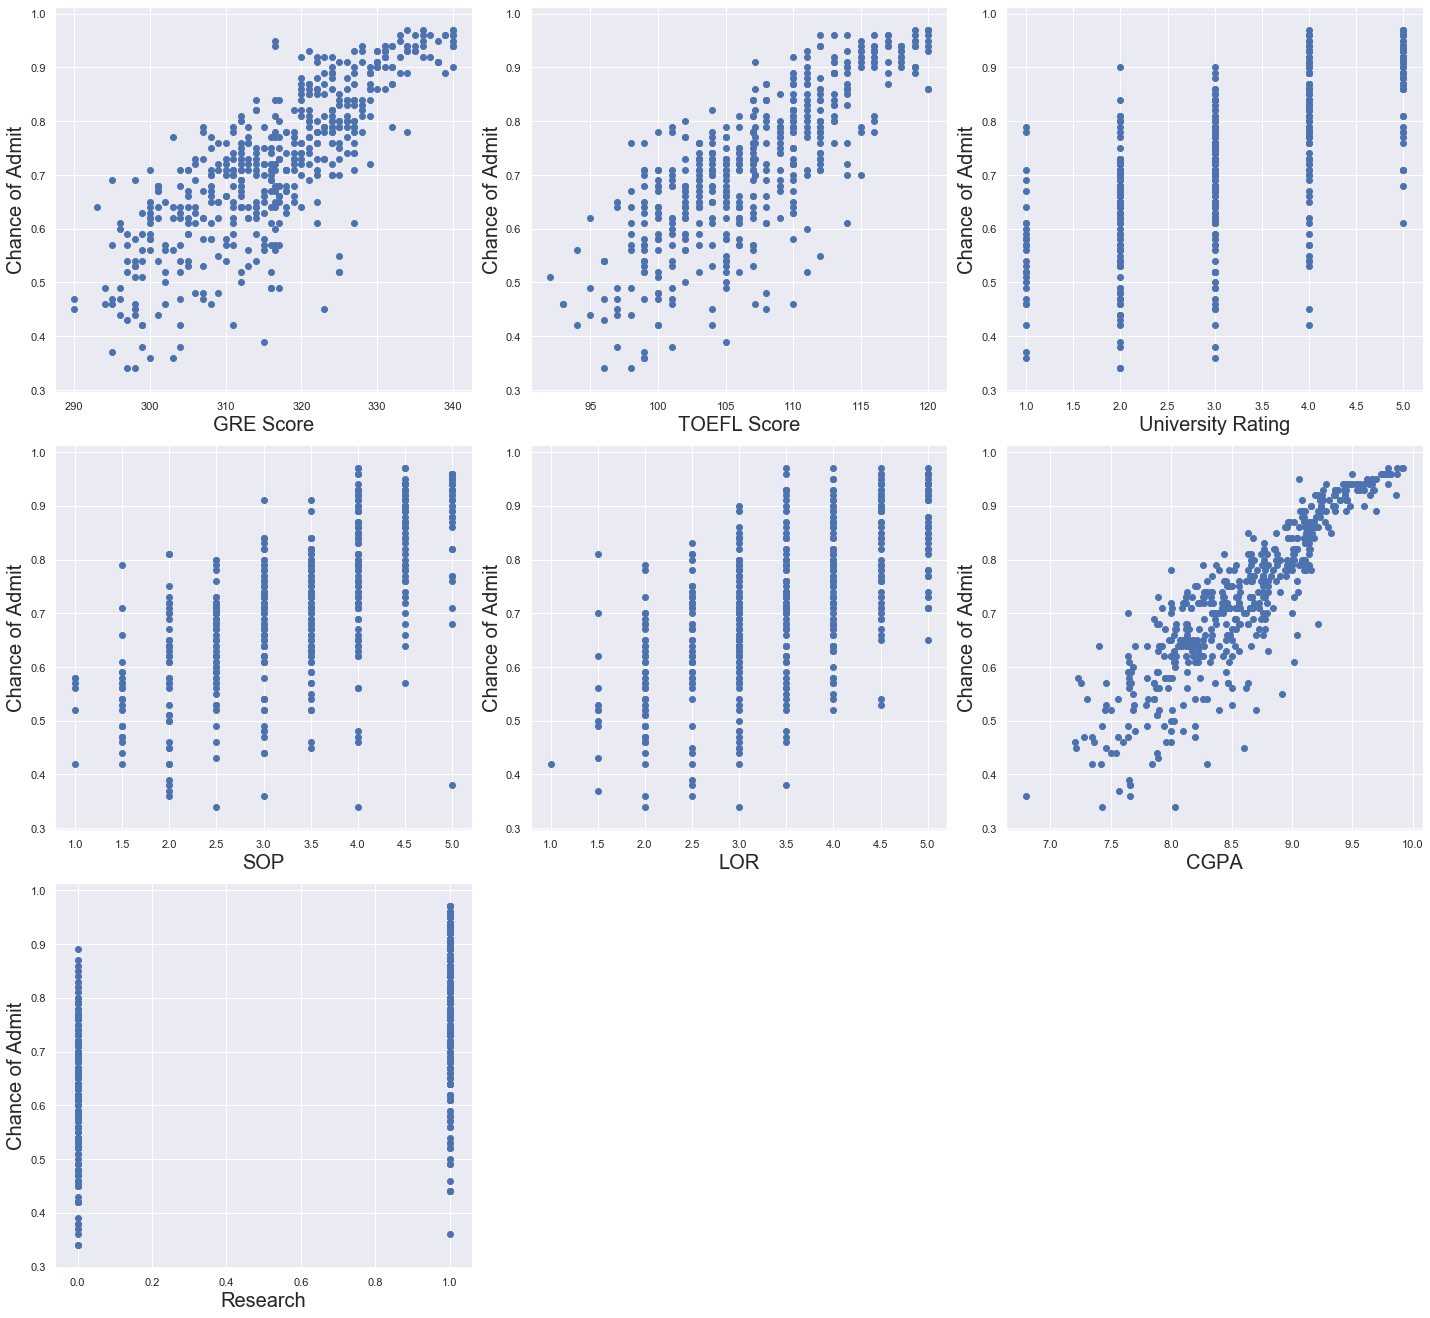

In [83]:
#Let's observe the relationship between independent variables and dependent variable

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [96]:
# standerdscaaler to scaleing our features/ variables

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [98]:
#correlation check  between all the X variables using VIF => variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns


In [100]:
vif["VIF"]

0    4.152735
1    3.793345
2    2.517272
3    2.776393
4    2.037449
5    4.654369
6    1.459411
Name: VIF, dtype: float64

In [101]:
vif["Features"]

0            GRE Score
1          TOEFL Score
2    University Rating
3                  SOP
4                  LOR
5                 CGPA
6             Research
Name: Features, dtype: object

In [102]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

In [94]:
###   need to check method

X.corr( method = 'GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research')

SyntaxError: positional argument follows keyword argument (<ipython-input-94-9d371404b6d0>, line 3)

In [125]:
# createing testset and trainset from scaled data set

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=1000) 

## random state could be used no affect on model

In [126]:
# createing Regressor

regression = LinearRegression()

In [127]:
# fit the training set ("x_train & y_train") into regressor


regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
# saving the model to the local file system
filename = 'Add_Chance_finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [129]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.93927496])

In [130]:
## check  the coefficient of determination R^2 of the prediction.
regression.score(x_train,y_train)

0.8256142745301425

In [131]:
adj_r2(x_train,y_train)

0.8222881162786738

#Our r2 score is 82.56% and adj r2 is 82.22% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.



In [132]:
regression.score(x_test,y_test)   # r2 score

0.8032478998185429

In [133]:
adj_r2(x_test,y_test)

0.7914764066452934

So it looks like our model r2 score is less on the test data.

**Let's see if our model is overfitting our training data.**

# Lasso Regularization

In [137]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [138]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

9.180107668492445e-06

In [139]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=9.180107668492445e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
lasso_reg.score(x_test, y_test)

0.8032441716315568

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

# Using Ridge regression

In [141]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.56103512, 3.75308813, 1.96194963, 4.49200958, 2.88697228,
       2.09855918, 7.64511867, 1.13989458, 7.67129791, 8.79900599,
       1.01032303, 9.46982086, 0.76803303, 0.49393896, 0.28477668,
       9.80517285, 1.02032617, 1.24035184, 1.60945405, 9.87211855,
       2.43894541, 6.81815023, 7.81950454, 5.8347555 , 2.89062903,
       9.9928972 , 4.37882046, 1.38627331, 9.36203588, 6.78294701,
       5.84431486, 9.18325238, 9.13077789, 7.78726009, 9.75733523,
       8.3526392 , 4.68930374, 3.38045686, 9.94157427, 5.26018424,
       5.58795842, 2.72148432, 6.76246633, 5.51973744, 2.32529215,
       5.23350801, 8.24368883, 5.84079661, 2.48527601, 7.70410318]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [142]:
ridgecv.alpha_

0.28477668252416155

In [143]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.28477668252416155, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
ridge_model.score(x_test, y_test)

0.8033422295001558

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

# Elastic net

In [145]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [146]:
elasticCV.alpha_

0.00031331810537435755

In [147]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [148]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.00031331810537435755, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [149]:
elasticnet_reg.score(x_test, y_test)

0.8031951728296616

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

# Multiple Linear Regression with Categorical variables